# ML, Data Analysis
### Probability: covariance matrix

The **covariance matrix** extends the idea of variance and covariance for n-dimensional random vectors. Thus, the vocariance matrix for an n-dimensional random vector $X$ is $n\times n$ symmetric matrix where:
- diagonal elements are variance of each component of vector $X$
- off-diagonal elements are covariance between componets of vector $X$

Formally, the **covariance matrix** $cov(X)$, also called **auto-covariance matrix**, for a random vector $\boldsymbol{X}=[X_1,X_2,...,X_n]^T$ is computed by:
<div style="margin-top: 6px;"></div>
$\large cov(\boldsymbol{X})=E[(\boldsymbol{X}-E[\boldsymbol{X}])(\boldsymbol{X}-E(\boldsymbol{X}))^T]$
<br> Or equivalently:<br>
$\large cov(\boldsymbol{X})=E[\boldsymbol{X}\boldsymbol{X}^T]-E[\boldsymbol{X}]E[\boldsymbol{X}]^T$
<div style="margin-bottom: 6px;"></div>

where $E[\boldsymbol{X}]$ is the mean vector of $\boldsymbol{X}$. In fact, it is the vector of means of the components: 
<div style="margin-top: 6px;"></div>
$E[\boldsymbol{X}]=[E[X_1],E[X_2],...,E[X_n]]^T$

<br>Some properties of covariance matrix $cov(\boldsymbol{X})$:
1. **Symmetry:** $cov(\boldsymbol{X})=cov(\boldsymbol{X})^T$
2. **Positive semi-definite:** All eigenvalues of matrix $cov(\boldsymbol{X})$ are nonnegative. In other words, for any vector $v$, we have: \boldsymbol{v}^Tcov(\boldsymbol{X})\boldsymbol{V}>=0.
3. **Linear transformation:** For a matrix $A$ and random vector $X$, we have: $cov(A\cdot \boldsymbol{X})=A\cdot cov(\boldsymbol{X})\cdot A^T$

**Hint:** We can express the covariance of sum of two random vectors $\boldsymbol{X}$ and $\boldsymbol{Y}$ by:
<div style="margin-top: 6px;"></div>
$\large cov(\boldsymbol{X}+\boldsymbol{Y})=cov(\boldsymbol{X})+cov(\boldsymbol{Y})+
cov(\boldsymbol{X},\boldsymbol{Y})+cov(\boldsymbol{Y},\boldsymbol{X})$
<div style="margin-bottom: 6px;"></div>

where $cov(\boldsymbol{X},\boldsymbol{Y})$ is the **cross-covariance** of $\boldsymbol{X}$ and $\boldsymbol{Y}$ defined by:
<div style="margin-top: 6px;"></div>
$cov(\boldsymbol{X},\boldsymbol{Y})=E[(\boldsymbol{X}-E[\boldsymbol{X}])(\boldsymbol{Y}-E(\boldsymbol{Y}))^T]$
<br> Or equivalently:<br>
$cov(\boldsymbol{X},\boldsymbol{Y})=E[\boldsymbol{X}\boldsymbol{Y}^T]-E[\boldsymbol{X}]E[\boldsymbol{Y}]^T$
<div style="margin-bottom: 6px;"></div>

**Hint:** We also can show that: $cov(\boldsymbol{Y},\boldsymbol{X})=cov(\boldsymbol{X},\boldsymbol{Y})^T$.

**Reminder:** For the topic on the **expected value**, see the relevent post on this repository.
<hr>

In the following, we compute the covariance matrix for a sample of two-dimensional random vector.

<hr>
https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/background-knowledge

In [1]:
# Import required modules
import numpy as np
import matplotlib.pyplot as plt

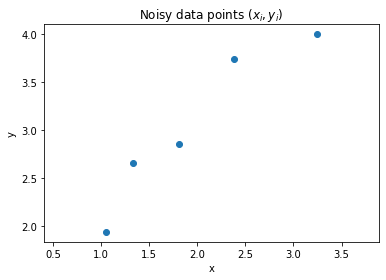

Cov. matrix, Manual calculation:
 [[0.76366245 0.69698309]
 [0.69698309 0.70075292]]

Cov. matrix, NumPy result:
 [[0.76366245 0.69698309]
 [0.69698309 0.70075292]]


In [3]:
# Example dataset of 2D vectors (e.g., [x, y] coordinates)
data = np.array([[1.0, 2.0],
    [1.5, 2.5],
    [2.0, 3.0],
    [2.5, 3.5],
    [3.0, 4.0]])  # Shape: (5 samples, 2 dimensions)
noisy_data=data+np.random.normal(0, .15, data.shape)

# Method 1: Manual calculation
def manual_covariance(data,bias=False):
    n = data.shape[0]
    mean = np.mean(data, axis=0,keepdims=True)
    centered = data - mean
    cov=centered.T @ centered
    if bias: cov/=n   # Population covariance
    else:    cov/=(n-1) # Sample covariance
    return cov

# Method 2: Using NumPy; rowvar=False means each row is a sample
# When bias=False, sample cov. is computed (1/(n-1) is used)
numpy_cov = np.cov(noisy_data, rowvar=False, bias=False)

# Plot the results
plt.scatter(noisy_data[:, 0], noisy_data[:, 1])
plt.xlabel('x'); plt.ylabel('y')
plt.title('Noisy data points $(x_i,y_i)$')
plt.axis('equal'); plt.show()
print('Cov. matrix, Manual calculation:\n', manual_covariance(noisy_data))
print('\nCov. matrix, NumPy result:\n', numpy_cov)